In [11]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
train_data = pd.read_csv("hw1-data/income.train.txt.5k", sep=",", names=["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"], engine="python")
dev_data = pd.read_csv("hw1-data/income.dev.txt", sep=",", names=["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"], engine="python")


In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Binarization
train_binary_data = encoder.fit_transform(train_data[["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country",]])
dev_binary_data = encoder.transform(dev_data[["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country",]])


In [14]:
X_train = pd.DataFrame(train_binary_data)
X_train.columns = X_train.columns.astype(str)
y_train = train_data["target"]

X_dev = pd.DataFrame(dev_binary_data)
X_dev.columns = X_dev.columns.astype(str)
y_dev = dev_data["target"]

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [16]:
naive_dev_err = []

for k in range(1,101,2):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)

	y_pred_dev = knn.predict(X_dev)
	accuracy_dev = accuracy_score(y_dev, y_pred_dev)
	naive_dev_err.append((1-accuracy_dev)*100)

In [17]:
num_processor = 'passthrough'
cat_processor = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
preprocessor = ColumnTransformer([("num", num_processor, ["age", "hours"]), ("cat", cat_processor, ["sector", "edu", "marriage", "occupation", "race", "sex", "country"])])

preprocessor.fit(train_data)

train_processed_data = preprocessor.transform(train_data)
dev_processed_data = preprocessor.transform(dev_data)

In [18]:
X_train = train_processed_data 
y_train = train_data["target"]

X_dev = dev_processed_data
y_dev = dev_data["target"]

In [19]:
smart_dev_err = []

for k in range(1,101,2):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)

	y_pred_dev = knn.predict(X_dev)
	accuracy_dev = accuracy_score(y_dev, y_pred_dev)
	smart_dev_err.append((1-accuracy_dev)*100)

In [21]:
from sklearn.preprocessing import MinMaxScaler

num_processor = MinMaxScaler(feature_range=(0, 2))
cat_processor = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
preprocessor = ColumnTransformer([("num", num_processor, ["age", "hours"]), ("cat", cat_processor, ["sector", "edu", "marriage", "occupation", "race", "sex", "country"])])

preprocessor.fit(train_data)

train_processed_data = preprocessor.transform(train_data)
dev_processed_data = preprocessor.transform(dev_data)

In [22]:
X_train = train_processed_data 
y_train = train_data["target"]

X_dev = dev_processed_data
y_dev = dev_data["target"]

In [23]:
smart_scaling_dev_err = []

for k in range(1,101,2):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)

	y_pred_dev = knn.predict(X_dev)
	accuracy_dev = accuracy_score(y_dev, y_pred_dev)
	smart_scaling_dev_err.append((1-accuracy_dev)*100)

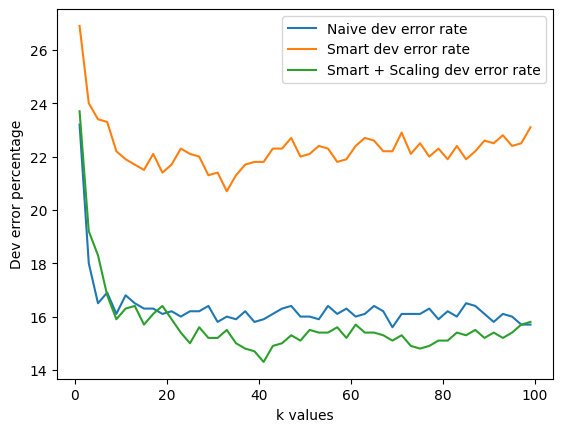

In [25]:
plt.plot([k for k in range(1,100,2)], naive_dev_err, label = 'Naive dev error rate')
plt.plot([k for k in range(1,100,2)], smart_dev_err, label = 'Smart dev error rate')
plt.plot([k for k in range(1,100,2)], smart_scaling_dev_err, label = 'Smart + Scaling dev error rate')
plt.xlabel('k values')
plt.ylabel('Dev error percentage')
plt.legend()
plt.show()